# Bollinger Band

5분 이동평균선 상향 돌파 Signal + 볼린저 밴드
총 시그널 발생 횟수: 0, 총 수익률: 0


/var/folders/qf/f467m8qs4rv1gpzcgr0nqbjm0000gn/T/ipykernel_70256/2112544001.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if using_case["Close"][i]>using_case["UpperB"][i]:


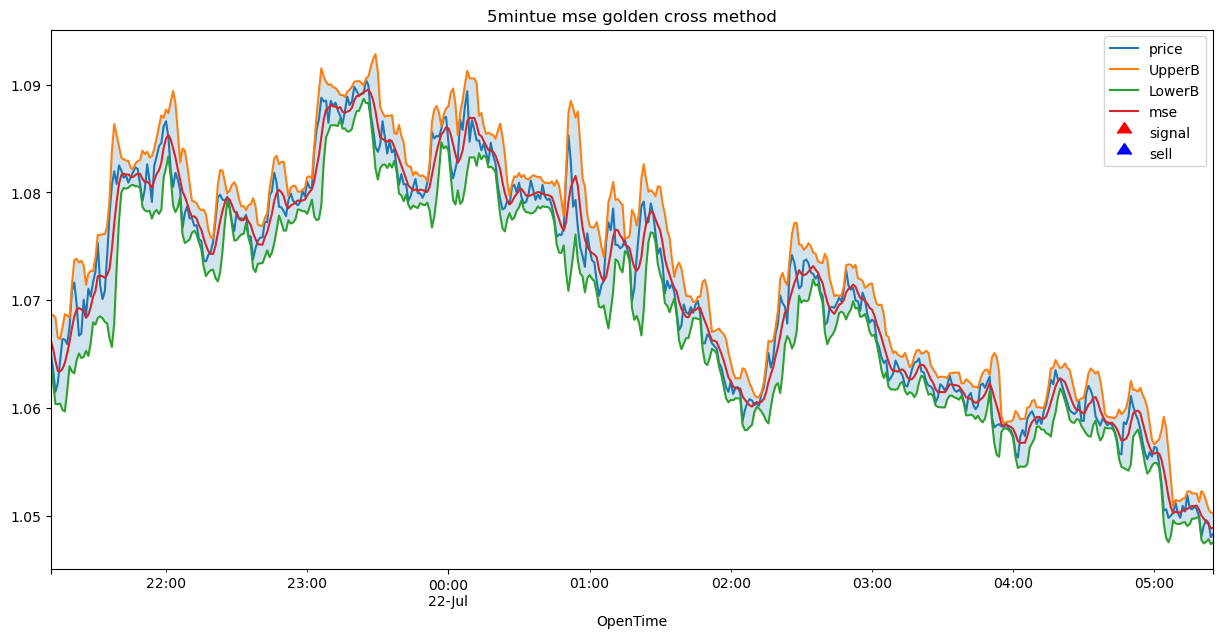

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
Ticker = 'JUP' #비트코인, 달러코인 페어
interval = '1m' # 1분봉
data=requests.get(f"https://fapi.binance.com/fapi/v1/markPriceKlines?symbol={Ticker}USDT&interval={interval}")
dic=json.loads(data.text)
df= pd.DataFrame(dic,columns=["OpenTime","Open","High","Low","Close","x","CloseTime","x2","x3","x3","x4","x5"])

df["OpenTime"] = pd.to_datetime(df['OpenTime'], unit='ms')
df.index = df["OpenTime"]
del df["OpenTime"]

using_case = pd.DataFrame(df["Close"])
using_case = using_case.astype('Float32')
#--------------------------------------------------------------------------------------------start
signal_i_list = []
signal_price_list = []
signal_return_list = []
signal_sell_list = []
sell_interval = 5
leverage = 5
trend = 1
k=2
#--------------------------------------------------------------------------------------------end

print(f"{sell_interval}분 이동평균선 상향 돌파 Signal + 볼린저 밴드")

using_case_rolling=using_case.rolling(sell_interval).mean()
using_case_stddev = using_case.rolling(sell_interval).std()
using_case["UpperB"]= using_case_rolling + (using_case_stddev * k)
using_case["LowerB"]= using_case_rolling - (using_case_stddev * k)

for i in range(1,len(using_case)):
  if i < 1 or i > len(using_case) - sell_interval:
      continue
  prev_price = using_case["Close"].iloc[i-1]
  current_price = using_case["Close"].iloc[i]
  prev_mse = using_case_rolling["Close"].iloc[i-1]
  current_mse = using_case_rolling["Close"].iloc[i]
  
  if using_case["Close"][i]>using_case["UpperB"][i]:
      sell_date = using_case["Close"].iloc[i+sell_interval]
      수익률 = trend*(sell_date-current_price) / current_price*100*leverage
      print(f"  -  Signal 발생!  매수주가 {current_price:.3f}  ->  매도주가 {sell_date:.3f}  , 수익률 {수익률:.3f} %")
     `` #--------------------------------------------------------------------------------------------start
      signal_i_list.append(using_case.index[i])
      signal_price_list.append(current_price)
      signal_sell_list.append(sell_date)
      signal_return_list.append(수익률)
      #--------------------------------------------------------------------------------------------end

# result
print(f"총 시그널 발생 횟수: {len(signal_return_list)}, 총 수익률: {sum(signal_return_list)}")

# visoal raise
using_case["Close"][sell_interval:].plot(figsize=(15,7), label='price');
using_case['UpperB'][sell_interval:].plot(label='UpperB');
using_case['LowerB'][sell_interval:].plot(label='LowerB');
using_case_rolling["Close"][sell_interval:].plot(label='mse');
plt.scatter(x=signal_i_list, y=signal_price_list, marker=10, color='red', s=100 , label='signal');
plt.scatter(x=signal_i_list, y=signal_sell_list, marker=10, color='blue', s=100 , label='sell');
plt.fill_between(using_case.index[sell_interval:], using_case['UpperB'][sell_interval:], using_case['LowerB'][sell_interval:], alpha=0.2)
plt.title(f"{sell_interval}mintue mse golden cross method")
plt.legend();